Desafio SVM realizado por Cristobal Novoa

# Desafío - Máquinas de Soporte Vectorial

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -
Máquinas de Soporte Vectorial.

Requerimientos

Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El
objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica
de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una
célula mamaria. Para más detalles técnicos asociados a la base de datos, pueden hacer click
en el link.

Ejercicio 1: Preparar el ambiente de trabajo

● Importe todas las librerías a utilizar.

● Fije los parámetros de los gráficos con plt.Rcparams.

● Excluya las columnas id y Unnamed: 32 de la base de datos.

● Recodifique el vector objetivo diagnosis a numérico para poder procesarlo
posteriormente.

In [1]:
#Se importan librerias
%config IPCompleter.greedy = True
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Se carga csv
df = pd.read_csv('breast_cancer.csv')

In [3]:
#Se muestra csv
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Se indican filas y columnas del csv
df.shape

(569, 33)

In [5]:
#Se eliminan columnas id y Unnamed: 32
df = df.drop(columns = ['id','Unnamed: 32'], axis=1)

In [6]:
#Se codifica variable diagnosis
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [7]:
#Se revisan valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

No hay valores nulos en el dataframe

In [8]:
#Se muestran estadisticas descriptivas
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Ejercicio 2: Visualizando la distribución de los atributos

● Para cada uno de los atributos, grafique los histogramas condicional a cada clase del
vector objetivo.

● Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los
atributos con una mayor similitud en la distribución.

# Analisis vector objetivo

Text(0.5, 1.0, 'Countplot diagnosis')

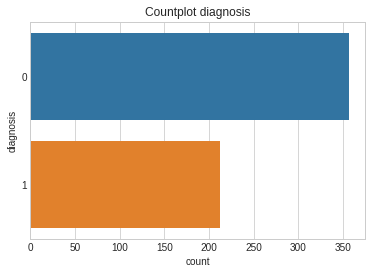

In [9]:
#Se grafica el vector objetivo
sns.countplot(y='diagnosis', data= df)
plt.title(f'Countplot diagnosis')

La mayoria de los datos pertenece a la clase 0, correspondiente a los tumores benignos

# Histogramas condicionales a cada clase del vector objetivo

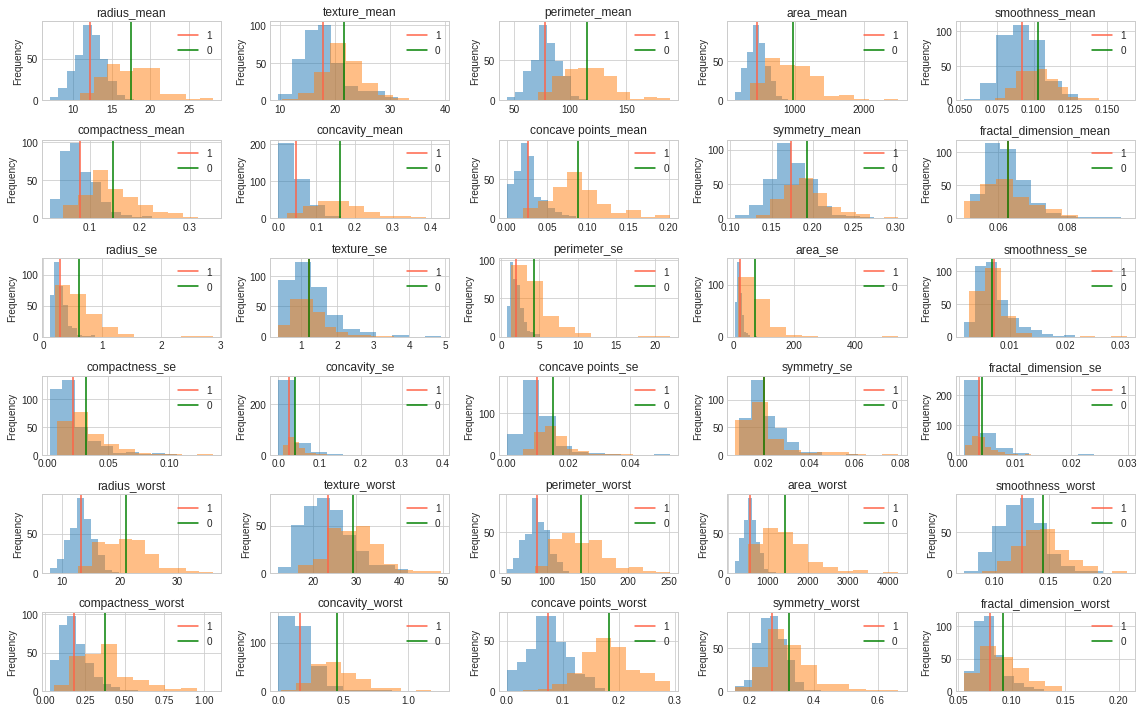

In [10]:
plt.figure(figsize=(16, 10))
for n, i in enumerate(df.drop(columns = 'diagnosis').columns):
    plt.subplot(6, 5, n + 1)
    df.groupby('diagnosis')[i].plot(kind='hist', alpha=.5) 
    
    mean_zero = df[df['diagnosis']==0][i].mean()
    plt.axvline(mean_zero, color='tomato')
    
    mean_one = df[df['diagnosis']==1][i].mean()
    plt.axvline(mean_one, color='green')
        
    plt.legend(df['diagnosis'].unique())
    plt.title(i)
    plt.tight_layout()

Gran parte de los atributos tienen gran similitud entre ellos en su distribucion solapandose entre ellos. Como por ejemplo, smothness_mean, symmetry_mean, fractal_dimension_mean, symmetry_se que se solapan completamente entre ellos.

# Ejercicio 3: Estimando el porcentaje de overlap en los atributos

● Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con
clases no separables mediante el proceso de kernelización. Resulta que un aspecto
importante que muchas veces se obvia es medir la noseparabilidad de los atributos,
condicional a cada clase del vector objetivo.

● El procedimiento para estimar el rango de noseparabilidad entre clases se implementa
en Python de la siguiente manera:

`def histogram_overlap(df, attribute, target, perc=100):
    empirical_lower_bound = np.floor(df[attribute].min())
    empirical_upper_bound = np.ceil(df[attribute].max())
    tmp_hist_holder = dict()
    for unique_value in np.unique(df[target]):
        tmp, _ = np.histogram(
            df[df[target] == unique_value][attribute],bins=perc,range=[empirical_lower_bound, empirical_upper_bound])
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima),np.sum(tmp_hist_holder["h_0"]))
    return intersection` 

● La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde
mayores niveles indican una mayor comunalidad.

● Utilizando la función, generará un data frame donde almacenará el nombre del atributo y
su porcentaje. Ordene este data frame de forma descendente y preserve.

In [11]:
def histogram_overlap(df, attribute, target, perc=100):
    empirical_lower_bound = np.floor(df[attribute].min())
    empirical_upper_bound = np.ceil(df[attribute].max())
    tmp_hist_holder = dict()
    for unique_value in np.unique(df[target]):
        tmp, _ = np.histogram(df[df[target] == unique_value][attribute],bins=perc,range=[empirical_lower_bound, empirical_upper_bound])
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima),np.sum(tmp_hist_holder["h_0"]))
    return round(intersection,3)

In [12]:
#Se genera lista con los indices de los atributos
lista_atrib = df.columns.tolist()

In [13]:
#Se genera listas con porcentajes
lista_porcentage = []
for i in lista_atrib:
    lista_porcentage.append(histogram_overlap(df, i, 'diagnosis'))

In [14]:
# Se crea un dataframe con los porcentajes de comunalidad y ordenan de mayor a menor 
data_reg = {'Porcentaje_comunalidad': lista_porcentage}
lista_index = df.columns.tolist()
df_comunalidad = pd.DataFrame(data= data_reg, index = lista_index)
by_com = df_comunalidad.sort_values('Porcentaje_comunalidad',ascending=False)

In [15]:
#Se muestran porcentajes de comunalidad
by_com

,Porcentaje_comunalidad
fractal_dimension_se,0.594
smoothness_se,0.591
fractal_dimension_mean,0.588
symmetry_se,0.569
texture_se,0.549
compactness_se,0.524
smoothness_mean,0.521
symmetry_mean,0.510
concave points_se,0.507
fractal_dimension_worst,0.493


# Ejercicio 4: Selección del modelo por GridSearchCV

● Entrene una serie de modelos SVC con los siguientes hiper parámetros:

○ C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000].

○ gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10].

○ Validaciones cruzadas: 10.

● Genere un heatmap en base a los puntajes estimados con GridSearchCV.

Tip: Vea cómo acceder a la llave mean_test_score en el diccionario cv_results_.

Digresión: Un par de elementos a considerar en la implementación de GridSearchCV.

Si trabajamos con sklearn.model_selection.GridSearchCV, tan solo haciendo la división en
dos muestras es suficiente, incorporando los conjuntos X_train y y_train a nuestro objeto
instanciado y preservando X_test e y_test como una muestra de validación externa. Si
tenemos un archivo de testing externo, se recomienda no hacer división


● El objeto creado con sklearn.model_selection.GridSearchCV sigue la misma
funcionalidad de cualquier método de estimación de scikit-learn, con los pasos de
Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:

○ sklearn.model_selection.GridSearchCV.cv_results_ devolverá un
diccionario donde las llaves representarán distintas métricas y los valores
representarán el desempeño de cada modelo.

○ split: Indicará la métrica específica en cada validación cruzada y combinación
de hiper parámetros.

○ time: Indicará el tiempo de ejecución en cada modelo.
○ Por lo general trabajaremos con mean_test_score y mean_train_score que
representa la media de CV para cada combinación de hiper parámetros.
○ sklearn.model_selection.GridSearchCV.best_estimator_ devuelve un
modelo listo para entrenar con la mejor combinación de hiper parámetros.
○ sklearn.model_selection.GridSearchCV.best_score_ devuelve el
desempeño promedio del modelo en el testing interno. Si es un problema de
clasificación devolverá Accuracy, si es un problema de regresión devolverá MSE.

● Reporte en qué rango de cada hiper parámetro el modelo presenta un desempeño
eficiente. Reporte la mejor combinación de hiper parámetros y el desempeño en la
muestra de entrenamiento.

In [16]:
# Estandarizamos la matriz de atributos
matriz_atrib= df.loc[:,'radius_mean':'fractal_dimension_worst']
vector_objetivo = df['diagnosis']

# Generamos conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(matriz_atrib, vector_objetivo, random_state=4982, test_size=.33)

In [17]:
# rango de C
c_param_range =  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# rango de Gamma
gamma_param_range = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#Se indican los parametros y se genera gridsearch para encontrar la mejor combinacion de hiperparametros
parameters = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma':[0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [19]:
#Se reporta la mejor combinacion de hiperparametros
clf.best_estimator_

SVC(C=10, gamma=0.0001)

In [20]:
#Se genera matriz con resultados de gridsearch
cv_params = clf.cv_results_['mean_test_score'].reshape(8,7)

Text(0.5, 1, 'Accuracy Heatmap')

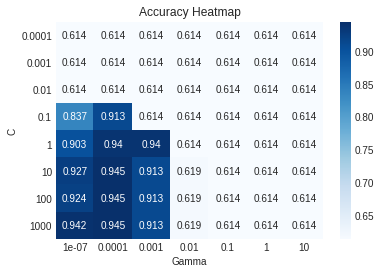

In [21]:
#Se genera heatmap con hiperparametros y sus valores de desempeño
sns.heatmap(data = cv_params,annot=True, cmap='Blues',cbar=True, xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".3")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap')

El rango en que la mejor combinacion de hiperparametros es cuando C esta entre 1 y 1000 y gamma esta en 0.0001

# Ejercicio 5: Validación del modelo en el hold-out sample

● Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros.
Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación.
Comente en qué casos el modelo presenta un desempeño deficiente.

In [22]:
#Se genera pipeline del modelo con la mejor combinacion de hiperparametros
refactor_svc_rbf = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', C=10, gamma=0.0001))])

In [23]:
#Se entrena el modelo y se reportan sus metricas
model_refactor = refactor_svc_rbf.fit(X_train, y_train)
yhat = model_refactor.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       123
           1       1.00      0.88      0.93        65

    accuracy                           0.96       188
   macro avg       0.97      0.94      0.95       188
weighted avg       0.96      0.96      0.96       188



In [24]:
#Se genera matriz de confusion
pd.crosstab(y_test, yhat)

col_0,0,1
diagnosis,,
0,123,0
1,8,57


El modelo es un poco deficiente en la prediccion de la clase 1, sin embargo, es totalmente aceptable, considerando su muy buen desempeño en terminos generales. 